# Analysis of Factors Influencing ROPGadget's Gadget Discovery

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

In [31]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# Load data
data = pd.read_csv("output.csv")
data

,Purpose,Structure,SourceCodeSize,MainCppSize,OptimizationLevel,BinarySize,Linkage,UniqueGadgets,ROPgadgetTime
0,arithmetic,dense,large,314,O0,15960,dynamic,78,0.100
1,arithmetic,dense,large,314,O0,900312,static,40772,0.762
2,arithmetic,dense,large,314,O1,15968,dynamic,65,0.051
3,arithmetic,dense,large,314,O1,900280,static,40857,0.766
4,arithmetic,dense,large,314,O2,15968,dynamic,62,0.050
5,arithmetic,dense,large,314,O2,900280,static,40850,0.757
6,arithmetic,dense,large,314,O3,15968,dynamic,69,0.050
7,arithmetic,dense,large,314,O3,900280,static,40829,0.744
8,arithmetic,dense,medium,250,O0,15960,dynamic,73,0.050
9,arithmetic,dense,medium,250,O0,900312,static,40776,0.756


---

# Linkage

## Gadgets Discovered

In [32]:
mean_gadgets = data.groupby("Linkage")["UniqueGadgets"].mean().reset_index()
print(mean_gadgets)

   Linkage  UniqueGadgets
0  dynamic      69.555556
1   static   40825.513889


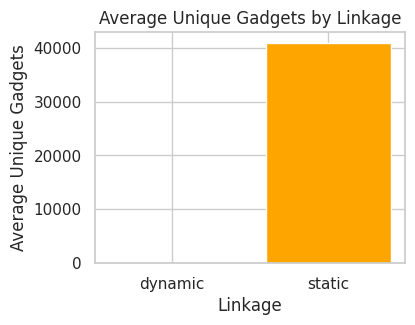

In [33]:
# Plot the average UniqueGadgets
plt.figure(figsize=(4, 3))
plt.bar(mean_gadgets["Linkage"], mean_gadgets["UniqueGadgets"], color=["blue", "orange"])
plt.title("Average Unique Gadgets by Linkage")
plt.xlabel("Linkage")
plt.ylabel("Average Unique Gadgets")
plt.show()

## Gadget Discovery Time

In [34]:
mean_time = data.groupby("Linkage")["ROPgadgetTime"].mean().reset_index()
print(mean_time)

   Linkage  ROPgadgetTime
0  dynamic       0.050833
1   static       0.749944


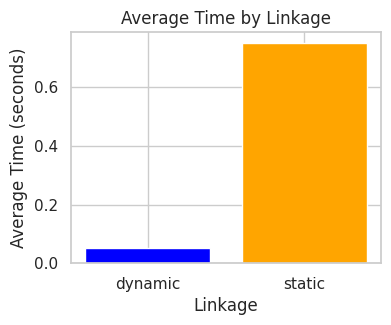

In [35]:
# Plot the average time
plt.figure(figsize=(4, 3))
plt.bar(mean_time["Linkage"], mean_time["ROPgadgetTime"], color=["blue", "orange"])
plt.title("Average Time by Linkage")
plt.xlabel("Linkage")
plt.ylabel("Average Time (seconds)")
plt.show()

---

# Binary Size

## Gadgets Discovered

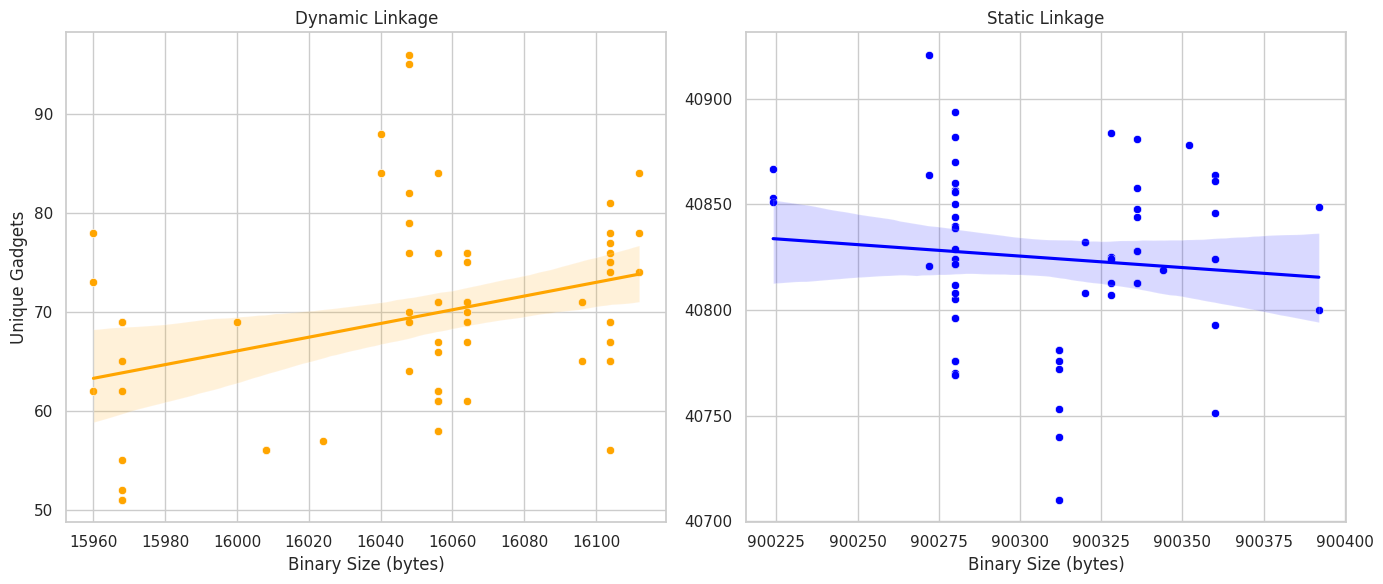

In [36]:
static_data = data[data["Linkage"] == "static"]
# Remove one outlier from static data
static_data = static_data[(static_data["BinarySize"] <= 904000)]

dynamic_data = data[data["Linkage"] == "dynamic"]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for dynamic data
sns.scatterplot(
    x="BinarySize", y="UniqueGadgets", data=dynamic_data, ax=axes[0], color="orange"
)
sns.regplot(
    x="BinarySize",
    y="UniqueGadgets",
    data=dynamic_data,
    ax=axes[0],
    color="orange",
    scatter_kws={'s': 10}
)
axes[0].set_title("Dynamic Linkage")
axes[0].set_xlabel("Binary Size (bytes)")
axes[0].set_ylabel("Unique Gadgets")

# Scatter plot for static data
sns.scatterplot(
    x="BinarySize", y="UniqueGadgets", data=static_data, ax=axes[1], color="blue"
)
sns.regplot(
    x="BinarySize",
    y="UniqueGadgets",
    data=static_data,
    ax=axes[1],
    color="blue",
    scatter_kws={'s': 10}
)
axes[1].set_title("Static Linkage")
axes[1].set_xlabel("Binary Size (bytes)")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


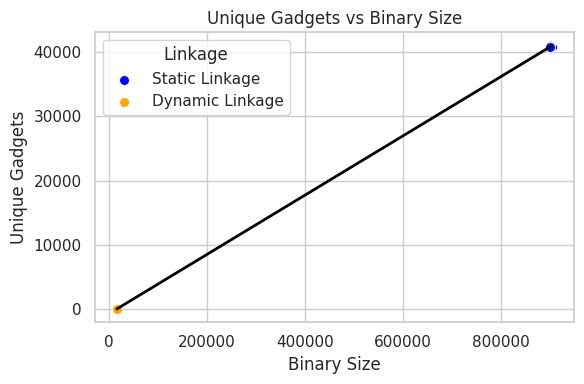

In [37]:
plt.figure(figsize=(6, 4))

# Scatter plot for static data
sns.scatterplot(
    x="BinarySize",
    y="UniqueGadgets",
    data=data[data["Linkage"] == "static"],
    color="blue",
    label="Static Linkage",
    s=50  # Marker size
)

# Scatter plot for dynamic data
sns.scatterplot(
    x="BinarySize",
    y="UniqueGadgets",
    data=data[data["Linkage"] == "dynamic"],
    color="orange",
    label="Dynamic Linkage",
    s=50  # Marker size
)

# Add trendline
sns.regplot(
    x="BinarySize",
    y="UniqueGadgets",
    data=data,
    scatter=False,  # Avoid duplicating points
    color="black",  # Trendline color
    line_kws={"linewidth": 2},  # Customize line width
)

plt.title("Unique Gadgets vs Binary Size")
plt.xlabel("Binary Size")
plt.ylabel("Unique Gadgets")
plt.legend(title="Linkage")

plt.tight_layout()
plt.show()

## Gadget Discovery Time

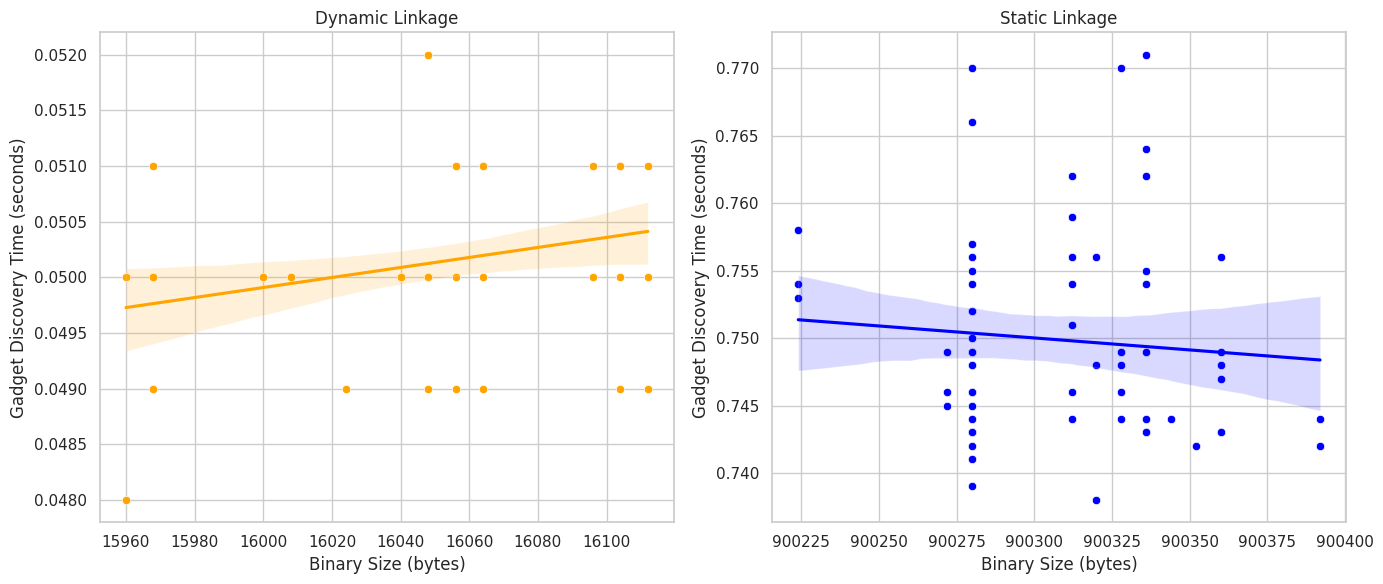

In [38]:
static_data = data[data["Linkage"] == "static"]
# Remove one outlier from static data
static_data = static_data[(static_data["BinarySize"] <= 904000)]

dynamic_data = data[data["Linkage"] == "dynamic"]
# Remove one outlier from dynamic data
dynamic_data = dynamic_data[(dynamic_data["ROPgadgetTime"] <= 0.09)]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for dynamic data
sns.scatterplot(
    x="BinarySize", y="ROPgadgetTime", data=dynamic_data, ax=axes[0], color="orange"
)
sns.regplot(
    x="BinarySize",
    y="ROPgadgetTime",
    data=dynamic_data,
    ax=axes[0],
    color="orange",
    scatter_kws={'s': 10}
)
axes[0].set_title("Dynamic Linkage")
axes[0].set_xlabel("Binary Size (bytes)")
axes[0].set_ylabel("Gadget Discovery Time (seconds)")

# Scatter plot for static data
sns.scatterplot(
    x="BinarySize", y="ROPgadgetTime", data=static_data, ax=axes[1], color="blue"
)
sns.regplot(
    x="BinarySize",
    y="ROPgadgetTime",
    data=static_data,
    ax=axes[1],
    color="blue",
    scatter_kws={'s': 10}
)
axes[1].set_title("Static Linkage")
axes[1].set_xlabel("Binary Size (bytes)")
axes[1].set_ylabel("Gadget Discovery Time (seconds)")

plt.tight_layout()
plt.show()

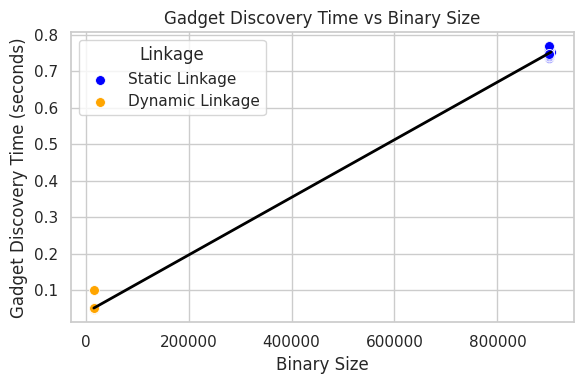

In [39]:
plt.figure(figsize=(6, 4))

# Scatter plot for static data
sns.scatterplot(
    x="BinarySize",
    y="ROPgadgetTime",
    data=data[data["Linkage"] == "static"],
    color="blue",
    label="Static Linkage",
    s=50  # Marker size
)

# Scatter plot for dynamic data
sns.scatterplot(
    x="BinarySize",
    y="ROPgadgetTime",
    data=data[data["Linkage"] == "dynamic"],
    color="orange",
    label="Dynamic Linkage",
    s=50  # Marker size
)

# Add trendline
sns.regplot(
    x="BinarySize",
    y="ROPgadgetTime",
    data=data,
    scatter=False,
    color="black",
    line_kws={"linewidth": 2},
)

plt.title("Gadget Discovery Time vs Binary Size")
plt.xlabel("Binary Size")
plt.ylabel("Gadget Discovery Time (seconds)")
plt.legend(title="Linkage")

plt.tight_layout()
plt.show()

---

# Source Code Size

## Gadgets Discovered

In [40]:
static_data = data[data["Linkage"] == "static"]
dynamic_data = data[data["Linkage"] == "dynamic"]

static_means = static_data.groupby("SourceCodeSize")["UniqueGadgets"].mean().reset_index()
print("Static Linkage Means by SourceCodeSize:")
print(static_means)

dynamic_means = dynamic_data.groupby("SourceCodeSize")["UniqueGadgets"].mean().reset_index()
print("\nDynamic Linkage Means by SourceCodeSize:")
print(dynamic_means)

Static Linkage Means by SourceCodeSize:
  SourceCodeSize  UniqueGadgets
0          large   40825.916667
1         medium   40827.000000
2          small   40823.625000

Dynamic Linkage Means by SourceCodeSize:
  SourceCodeSize  UniqueGadgets
0          large      73.916667
1         medium      72.416667
2          small      62.333333


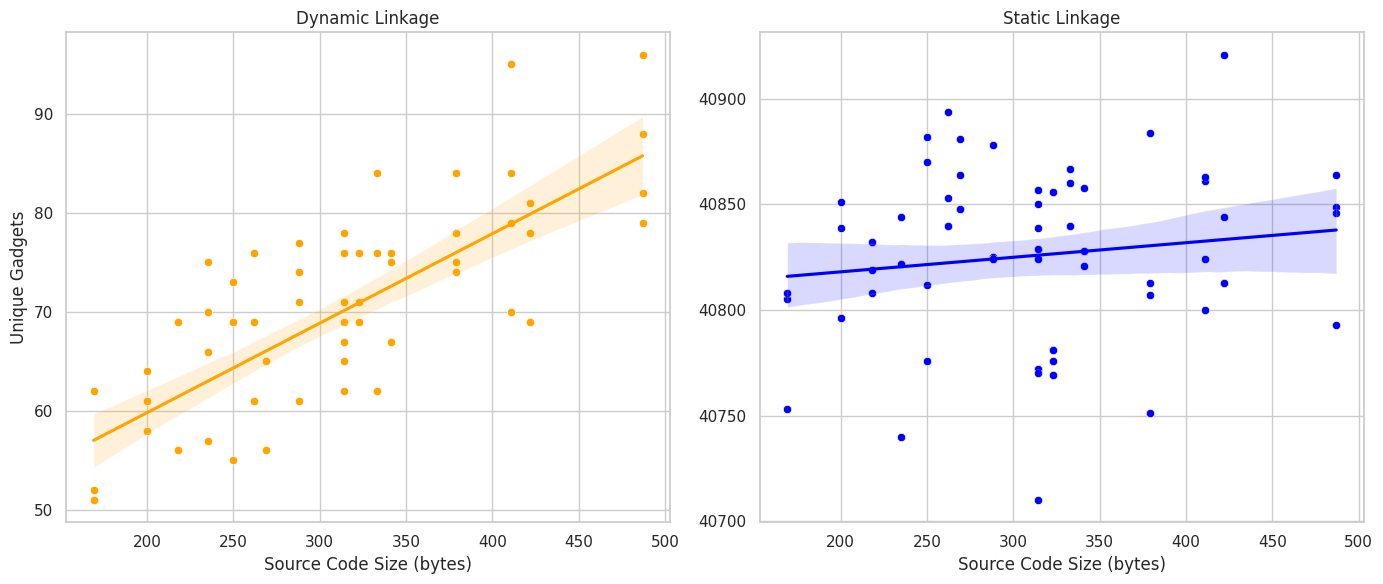

In [41]:
static_data = data[data["Linkage"] == "static"]

dynamic_data = data[data["Linkage"] == "dynamic"]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for dynamic data
sns.scatterplot(
    x="MainCppSize", y="UniqueGadgets", data=dynamic_data, ax=axes[0], color="orange"
)
sns.regplot(
    x="MainCppSize",
    y="UniqueGadgets",
    data=dynamic_data,
    ax=axes[0],
    color="orange",
    scatter_kws={'s': 10}
)
axes[0].set_title("Dynamic Linkage")
axes[0].set_xlabel("Source Code Size (bytes)")
axes[0].set_ylabel("Unique Gadgets")

# Scatter plot for static data
sns.scatterplot(
    x="MainCppSize", y="UniqueGadgets", data=static_data, ax=axes[1], color="blue"
)
sns.regplot(
    x="MainCppSize",
    y="UniqueGadgets",
    data=static_data,
    ax=axes[1],
    color="blue",
    scatter_kws={'s': 10}
)
axes[1].set_title("Static Linkage")
axes[1].set_xlabel("Source Code Size (bytes)")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

## Gadget Discovery Time

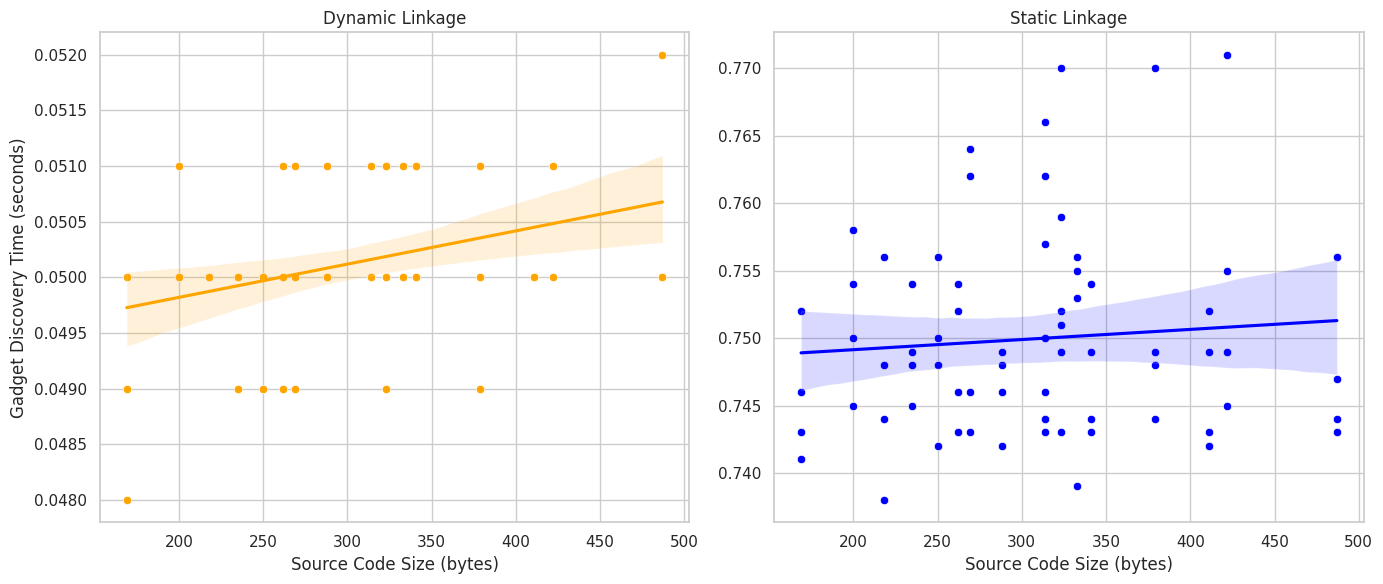

In [42]:
static_data = data[data["Linkage"] == "static"]

dynamic_data = data[data["Linkage"] == "dynamic"]
# Remove one outlier from dynamic data
dynamic_data = dynamic_data[(dynamic_data["ROPgadgetTime"] <= 0.09)]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for dynamic data
sns.scatterplot(
    x="MainCppSize", y="ROPgadgetTime", data=dynamic_data, ax=axes[0], color="orange"
)
sns.regplot(
    x="MainCppSize",
    y="ROPgadgetTime",
    data=dynamic_data,
    ax=axes[0],
    color="orange",
    scatter_kws={'s': 10}
)
axes[0].set_title("Dynamic Linkage")
axes[0].set_xlabel("Source Code Size (bytes)")
axes[0].set_ylabel("Gadget Discovery Time (seconds)")

# Scatter plot for static data
sns.scatterplot(
    x="MainCppSize", y="ROPgadgetTime", data=static_data, ax=axes[1], color="blue"
)
sns.regplot(
    x="MainCppSize",
    y="ROPgadgetTime",
    data=static_data,
    ax=axes[1],
    color="blue",
    scatter_kws={'s': 10}
)
axes[1].set_title("Static Linkage")
axes[1].set_xlabel("Source Code Size (bytes)")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

---

# Code Structure

## Gadgets Discovered

In [43]:
static_data = data[data["Linkage"] == "static"]
dynamic_data = data[data["Linkage"] == "dynamic"]

static_means = static_data.groupby("Structure")["UniqueGadgets"].mean().reset_index()
print("Static Linkage Means:")
print(static_means)

dynamic_means = dynamic_data.groupby("Structure")["UniqueGadgets"].mean().reset_index()
print("\nDynamic Linkage Means:")
print(dynamic_means)

Static Linkage Means:
  Structure  UniqueGadgets
0     dense   40819.194444
1    sparse   40831.833333

Dynamic Linkage Means:
  Structure  UniqueGadgets
0     dense      66.222222
1    sparse      72.888889


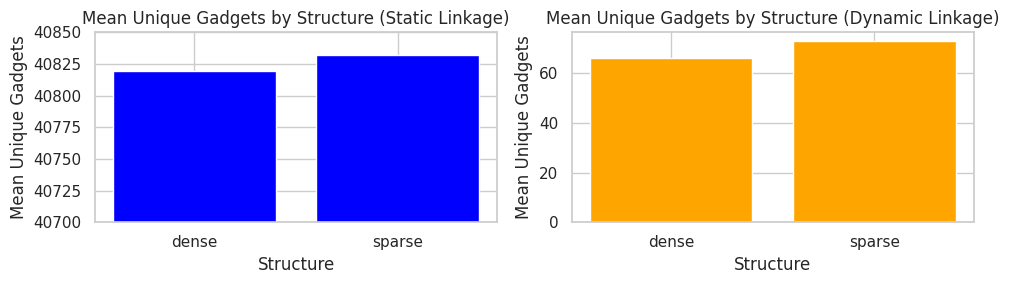

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Bar chart for static linkage
axes[0].bar(static_means["Structure"], static_means["UniqueGadgets"], color="blue")
axes[0].set_title("Mean Unique Gadgets by Structure (Static Linkage)")
axes[0].set_xlabel("Structure")
axes[0].set_ylabel("Mean Unique Gadgets")
axes[0].set_ylim(40700, 40850)

# Bar chart for dynamic linkage
axes[1].bar(dynamic_means["Structure"], dynamic_means["UniqueGadgets"], color="orange")
axes[1].set_title("Mean Unique Gadgets by Structure (Dynamic Linkage)")
axes[1].set_xlabel("Structure")
axes[1].set_ylabel("Mean Unique Gadgets")

plt.tight_layout()
plt.show()

## Gadget Discovery Time

In [45]:
static_data = data[data["Linkage"] == "static"]
dynamic_data = data[data["Linkage"] == "dynamic"]

static_means = static_data.groupby("Structure")["ROPgadgetTime"].mean().reset_index()
print("Static Linkage Means:")
print(static_means)

dynamic_means = dynamic_data.groupby("Structure")["ROPgadgetTime"].mean().reset_index()
print("\nDynamic Linkage Means:")
print(dynamic_means)

Static Linkage Means:
  Structure  ROPgadgetTime
0     dense       0.750111
1    sparse       0.749778

Dynamic Linkage Means:
  Structure  ROPgadgetTime
0     dense       0.051389
1    sparse       0.050278


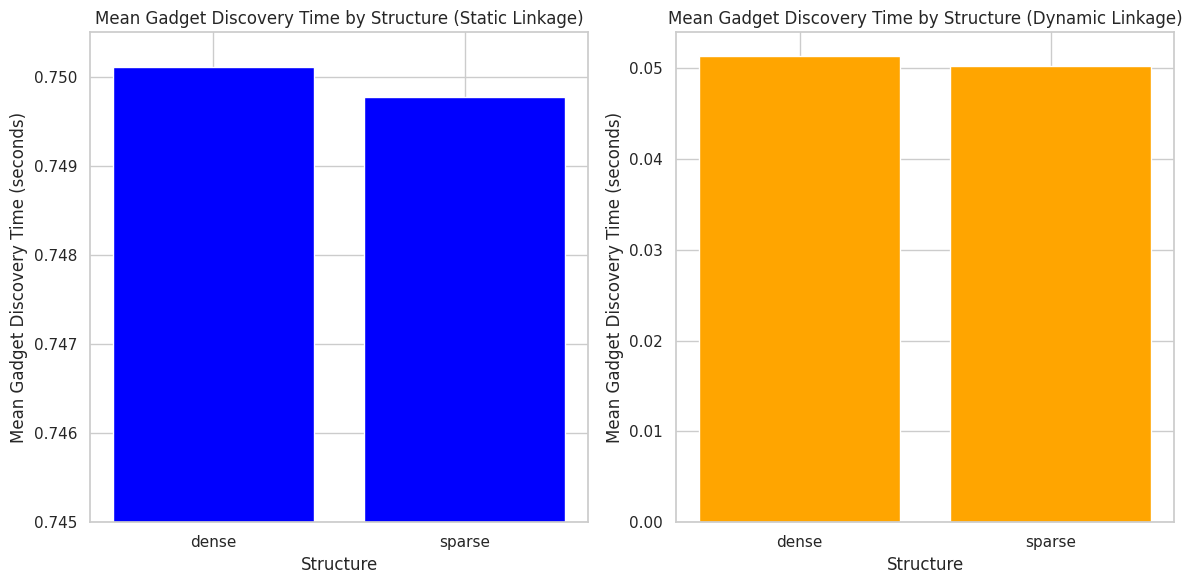

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart for static linkage
axes[0].bar(static_means["Structure"], static_means["ROPgadgetTime"], color="blue")
axes[0].set_title("Mean Gadget Discovery Time by Structure (Static Linkage)")
axes[0].set_xlabel("Structure")
axes[0].set_ylabel("Mean Gadget Discovery Time (seconds)")
axes[0].set_ylim(0.745, 0.7505)

# Bar chart for dynamic linkage
axes[1].bar(dynamic_means["Structure"], dynamic_means["ROPgadgetTime"], color="orange")
axes[1].set_title("Mean Gadget Discovery Time by Structure (Dynamic Linkage)")
axes[1].set_xlabel("Structure")
axes[1].set_ylabel("Mean Gadget Discovery Time (seconds)")

plt.tight_layout()
plt.show()

---

# Code Purpose

## Gadgets Discovered

In [47]:
static_data = data[data["Linkage"] == "static"]
dynamic_data = data[data["Linkage"] == "dynamic"]

static_means = static_data.groupby("Purpose")["UniqueGadgets"].mean().reset_index()
print("Static Linkage Means:")
print(static_means)

dynamic_means = dynamic_data.groupby("Purpose")["UniqueGadgets"].mean().reset_index()
print("\nDynamic Linkage Means:")
print(dynamic_means)

Static Linkage Means:
      Purpose  UniqueGadgets
0  arithmetic   40825.541667
1      fileio   40845.125000
2      string   40805.875000

Dynamic Linkage Means:
      Purpose  UniqueGadgets
0  arithmetic      69.416667
1      fileio      67.708333
2      string      71.541667


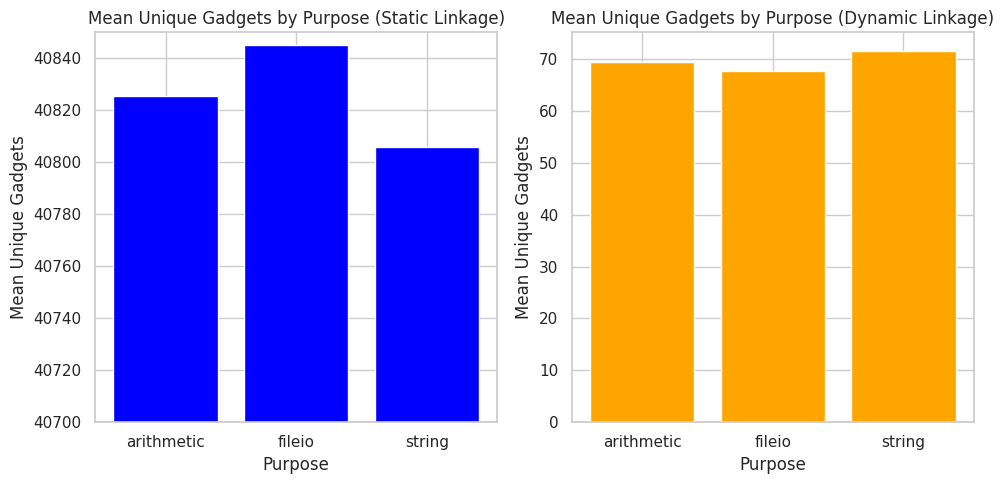

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Bar chart for static linkage
axes[0].bar(static_means["Purpose"], static_means["UniqueGadgets"], color="blue")
axes[0].set_title("Mean Unique Gadgets by Purpose (Static Linkage)")
axes[0].set_xlabel("Purpose")
axes[0].set_ylabel("Mean Unique Gadgets")
axes[0].set_ylim(40700, 40850)

# Bar chart for dynamic linkage
axes[1].bar(dynamic_means["Purpose"], dynamic_means["UniqueGadgets"], color="orange")
axes[1].set_title("Mean Unique Gadgets by Purpose (Dynamic Linkage)")
axes[1].set_xlabel("Purpose")
axes[1].set_ylabel("Mean Unique Gadgets")

plt.tight_layout()
plt.show()

## Gadget Discovery Time

In [49]:
static_data = data[data["Linkage"] == "static"]
dynamic_data = data[data["Linkage"] == "dynamic"]

static_means = static_data.groupby("Purpose")["ROPgadgetTime"].mean().reset_index()
print("Static Linkage Means:")
print(static_means)

dynamic_means = dynamic_data.groupby("Purpose")["ROPgadgetTime"].mean().reset_index()
print("\nDynamic Linkage Means:")
print(dynamic_means)

Static Linkage Means:
      Purpose  ROPgadgetTime
0  arithmetic       0.748708
1      fileio       0.751250
2      string       0.749875

Dynamic Linkage Means:
      Purpose  ROPgadgetTime
0  arithmetic       0.052042
1      fileio       0.050333
2      string       0.050125


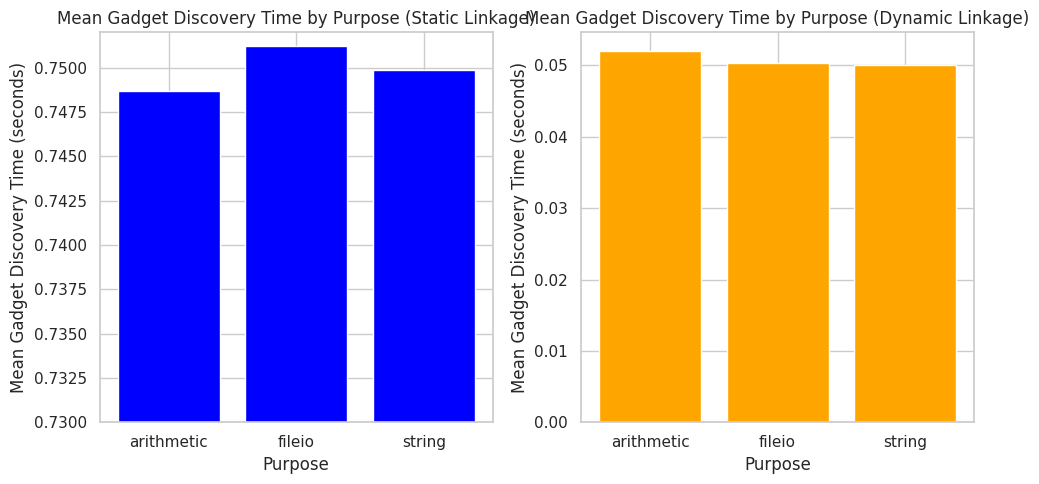

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Bar chart for static linkage
axes[0].bar(static_means["Purpose"], static_means["ROPgadgetTime"], color="blue")
axes[0].set_title("Mean Gadget Discovery Time by Purpose (Static Linkage)")
axes[0].set_xlabel("Purpose")
axes[0].set_ylabel("Mean Gadget Discovery Time (seconds)")
axes[0].set_ylim(0.73, 0.752)

# Bar chart for dynamic linkage
axes[1].bar(dynamic_means["Purpose"], dynamic_means["ROPgadgetTime"], color="orange")
axes[1].set_title("Mean Gadget Discovery Time by Purpose (Dynamic Linkage)")
axes[1].set_xlabel("Purpose")
axes[1].set_ylabel("Mean Gadget Discovery Time (seconds)")

plt.tight_layout()
plt.show()

---

# Optimization Level

## Gadget Discovery

In [51]:
static_data = data[data["Linkage"] == "static"]
dynamic_data = data[data["Linkage"] == "dynamic"]

static_means = static_data.groupby("OptimizationLevel")["BinarySize"].mean().reset_index()
print("Static Linkage Means:")
print(static_means)

dynamic_means = dynamic_data.groupby("OptimizationLevel")["BinarySize"].mean().reset_index()
print("\nDynamic Linkage Means:")
print(dynamic_means)

Static Linkage Means:
  OptimizationLevel     BinarySize
0                O0  900306.222222
1                O1  900305.777778
2                O2  900305.777778
3                O3  900533.333333

Dynamic Linkage Means:
  OptimizationLevel    BinarySize
0                O0  16046.222222
1                O1  16053.333333
2                O2  16053.333333
3                O3  16048.888889


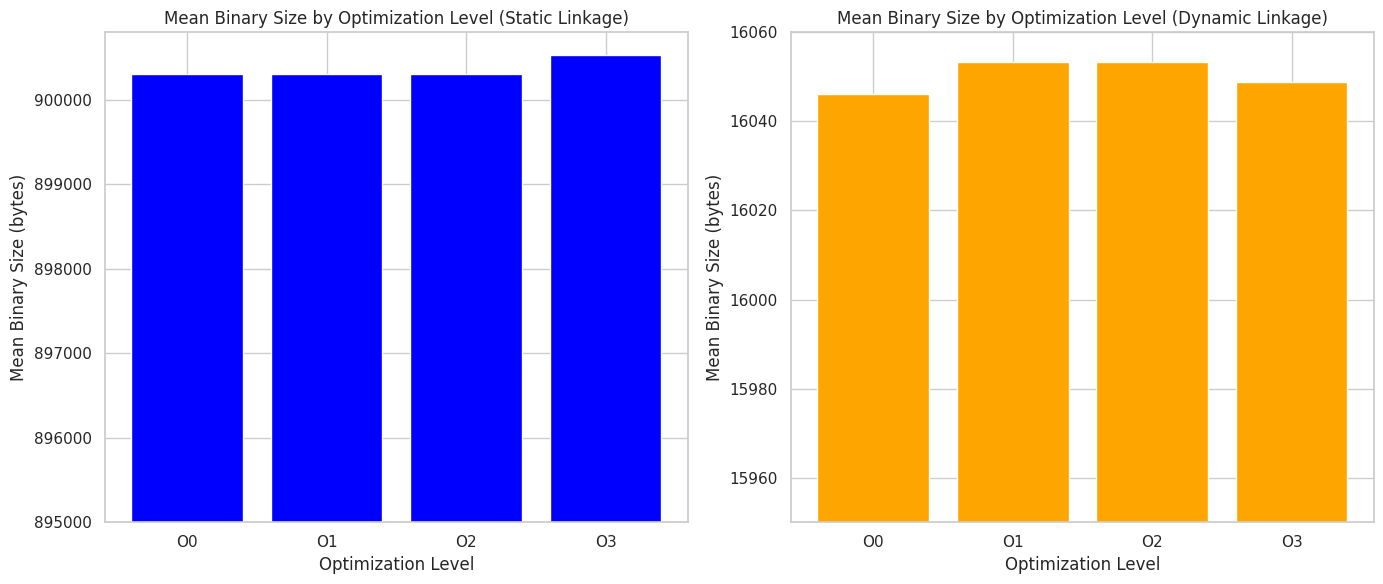

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for static linkage
axes[0].bar(static_means["OptimizationLevel"], static_means["BinarySize"], color="blue")
axes[0].set_title("Mean Binary Size by Optimization Level (Static Linkage)")
axes[0].set_xlabel("Optimization Level")
axes[0].set_ylabel("Mean Binary Size (bytes)")
axes[0].set_ylim(895000, 900800)

# Bar chart for dynamic linkage
axes[1].bar(dynamic_means["OptimizationLevel"], dynamic_means["BinarySize"], color="orange")
axes[1].set_title("Mean Binary Size by Optimization Level (Dynamic Linkage)")
axes[1].set_xlabel("Optimization Level")
axes[1].set_ylabel("Mean Binary Size (bytes)")
axes[1].set_ylim(15950, 16060)

plt.tight_layout()
plt.show()

In [53]:
static_data = data[data["Linkage"] == "static"]
dynamic_data = data[data["Linkage"] == "dynamic"]

static_means = static_data.groupby("OptimizationLevel")["UniqueGadgets"].mean().reset_index()
print("Static Linkage Means:")
print(static_means)

dynamic_means = dynamic_data.groupby("OptimizationLevel")["UniqueGadgets"].mean().reset_index()
print("\nDynamic Linkage Means:")
print(dynamic_means)

Static Linkage Means:
  OptimizationLevel  UniqueGadgets
0                O0   40810.388889
1                O1   40840.833333
2                O2   40823.166667
3                O3   40827.666667

Dynamic Linkage Means:
  OptimizationLevel  UniqueGadgets
0                O0      72.388889
1                O1      71.000000
2                O2      66.333333
3                O3      68.500000


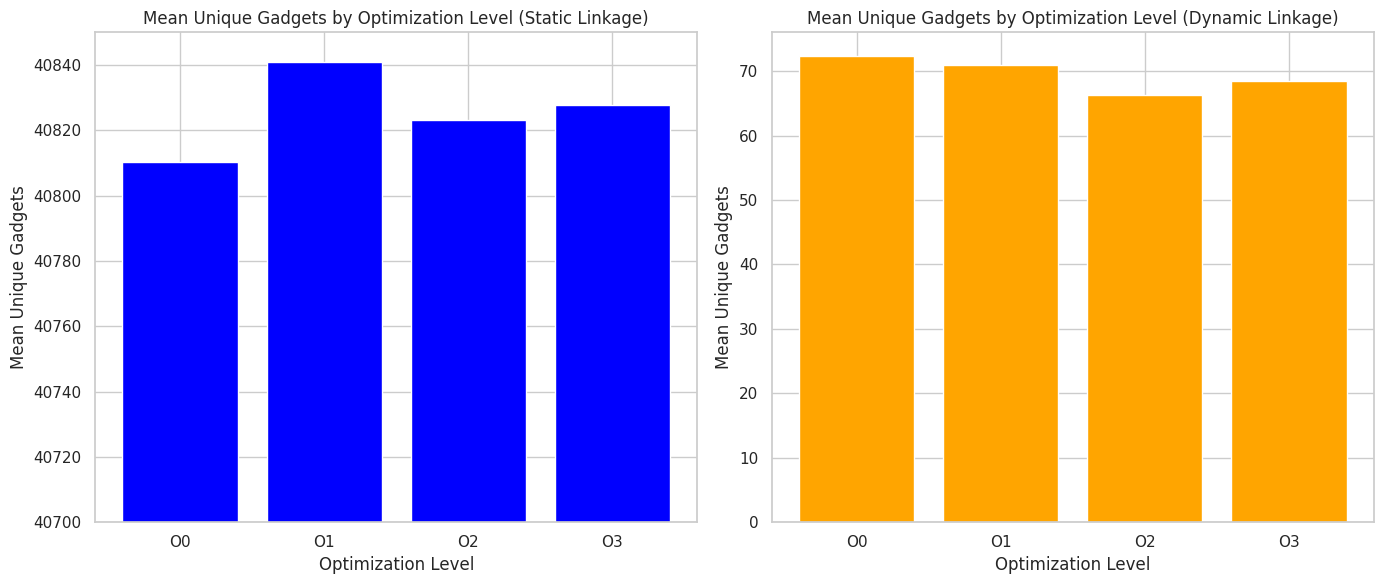

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for static linkage
axes[0].bar(static_means["OptimizationLevel"], static_means["UniqueGadgets"], color="blue")
axes[0].set_title("Mean Unique Gadgets by Optimization Level (Static Linkage)")
axes[0].set_xlabel("Optimization Level")
axes[0].set_ylabel("Mean Unique Gadgets")
axes[0].set_ylim(40700, 40850)

# Bar chart for dynamic linkage
axes[1].bar(dynamic_means["OptimizationLevel"], dynamic_means["UniqueGadgets"], color="orange")
axes[1].set_title("Mean Unique Gadgets by Optimization Level (Dynamic Linkage)")
axes[1].set_xlabel("Optimization Level")
axes[1].set_ylabel("Mean Unique Gadgets")

plt.tight_layout()
plt.show()

## Gadget Discovery Time

In [55]:
static_data = data[data["Linkage"] == "static"]
dynamic_data = data[data["Linkage"] == "dynamic"]

static_means = static_data.groupby("OptimizationLevel")["ROPgadgetTime"].mean().reset_index()
print("Static Linkage Means:")
print(static_means)

dynamic_means = dynamic_data.groupby("OptimizationLevel")["ROPgadgetTime"].mean().reset_index()
print("\nDynamic Linkage Means:")
print(dynamic_means)

Static Linkage Means:
  OptimizationLevel  ROPgadgetTime
0                O0       0.749833
1                O1       0.751667
2                O2       0.749500
3                O3       0.748778

Dynamic Linkage Means:
  OptimizationLevel  ROPgadgetTime
0                O0       0.052667
1                O1       0.050000
2                O2       0.050444
3                O3       0.050222


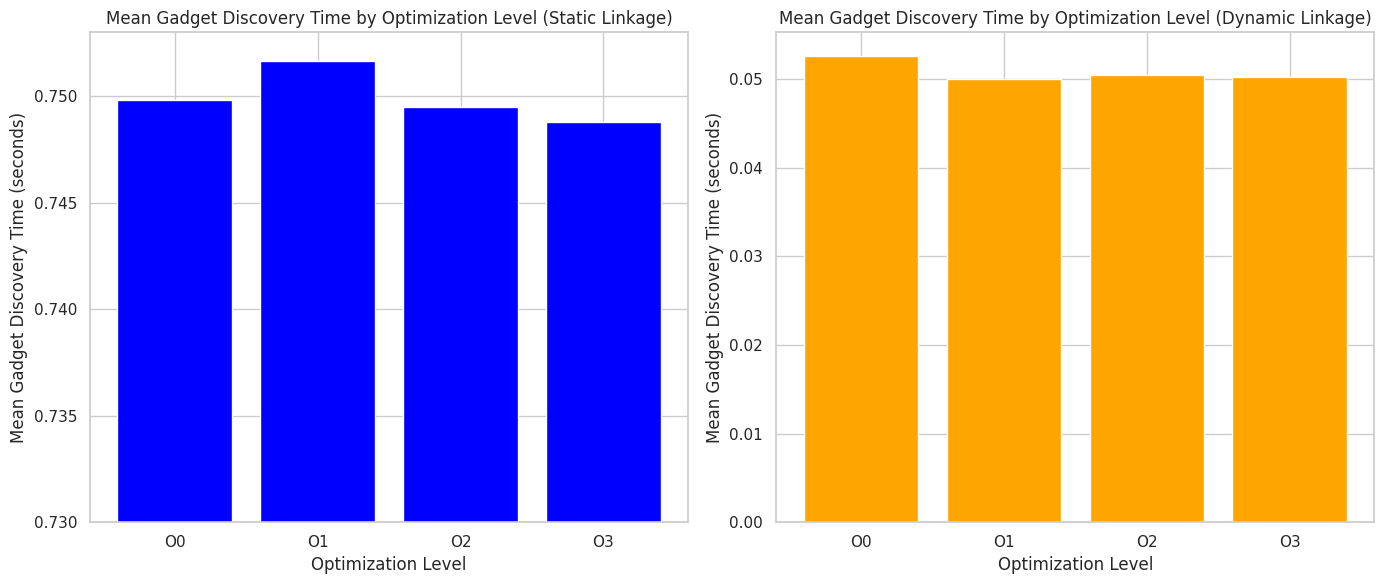

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for static linkage
axes[0].bar(static_means["OptimizationLevel"], static_means["ROPgadgetTime"], color="blue")
axes[0].set_title("Mean Gadget Discovery Time by Optimization Level (Static Linkage)")
axes[0].set_xlabel("Optimization Level")
axes[0].set_ylabel("Mean Gadget Discovery Time (seconds)")
axes[0].set_ylim(0.73, 0.753)

# Bar chart for dynamic linkage
axes[1].bar(dynamic_means["OptimizationLevel"], dynamic_means["ROPgadgetTime"], color="orange")
axes[1].set_title("Mean Gadget Discovery Time by Optimization Level (Dynamic Linkage)")
axes[1].set_xlabel("Optimization Level")
axes[1].set_ylabel("Mean Gadget Discovery Time (seconds)")

plt.tight_layout()
plt.show()

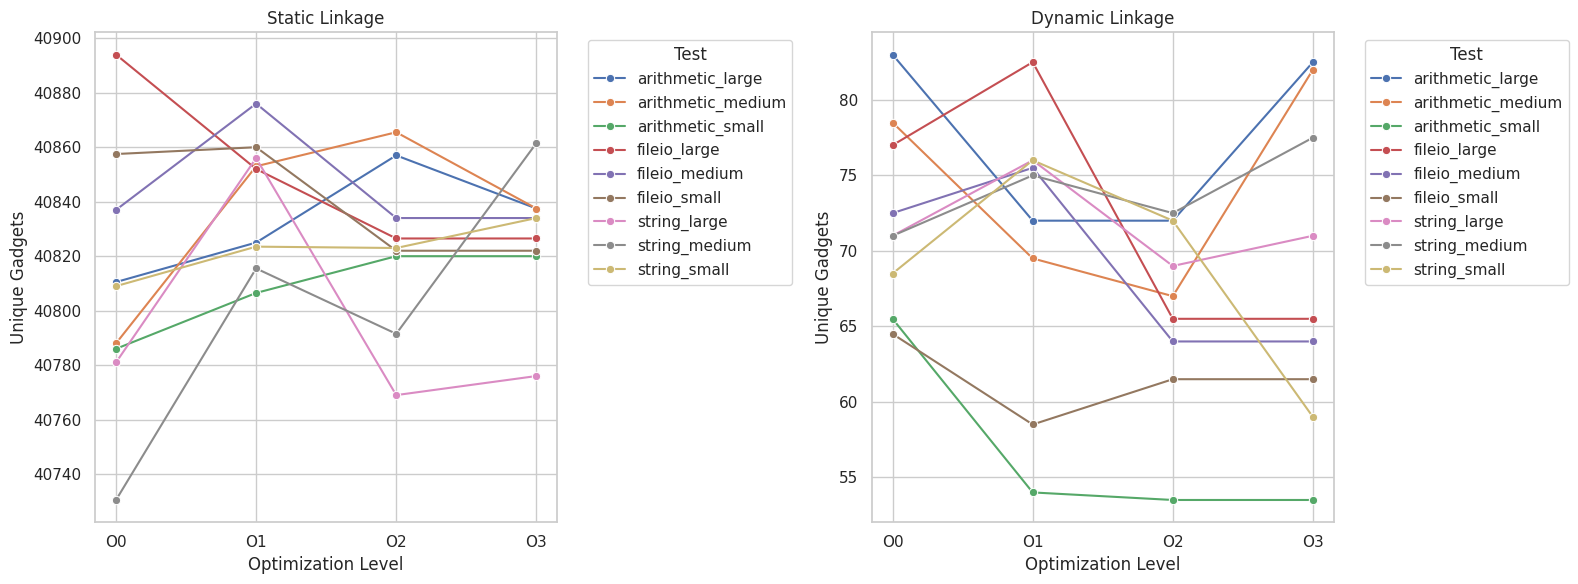

In [57]:
data = pd.read_csv("output.csv")
data["OptimizationLevel"] = pd.Categorical(data["OptimizationLevel"], categories=["O0", "O1", "O2", "O3"], ordered=True)
data["TestID"] = data["Purpose"] + "_" + data["SourceCodeSize"]

static_data = data[data["Linkage"] == "static"]
dynamic_data = data[data["Linkage"] == "dynamic"]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Static Linkage Plot
sns.lineplot(
    x="OptimizationLevel", 
    y="UniqueGadgets", 
    hue="TestID",  # Replace TestID with the column identifying individual tests
    data=static_data,
    marker="o",
    errorbar=None,
    ax=axes[0]
)
axes[0].set_title("Static Linkage")
axes[0].set_xlabel("Optimization Level")
axes[0].set_ylabel("Unique Gadgets")
axes[0].legend(title="Test", bbox_to_anchor=(1.05, 1), loc="upper left")

# Dynamic Linkage Plot
sns.lineplot(
    x="OptimizationLevel", 
    y="UniqueGadgets", 
    hue="TestID",  # Replace TestID with the column identifying individual tests
    data=dynamic_data,
    marker="o",
    errorbar=None,
    ax=axes[1]
)
axes[1].set_title("Dynamic Linkage")
axes[1].set_xlabel("Optimization Level")
axes[1].set_ylabel("Unique Gadgets")
axes[1].legend(title="Test", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


/tmp/ipykernel_123020/3557394573.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  static_agg = static_data.groupby("OptimizationLevel")["UniqueGadgets"].agg(["mean", "std"]).reset_index()
/tmp/ipykernel_123020/3557394573.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dynamic_agg = dynamic_data.groupby("OptimizationLevel")["UniqueGadgets"].agg(["mean", "std"]).reset_index()


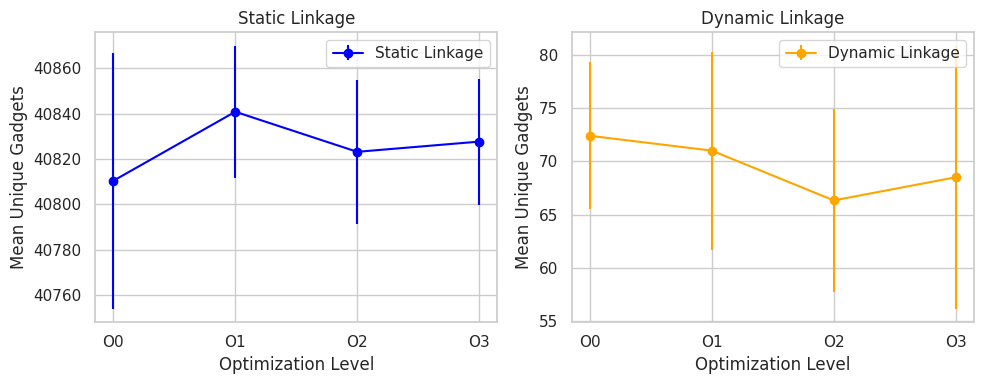

In [60]:
# Aggregate data to calculate mean and standard deviation
static_agg = static_data.groupby("OptimizationLevel")["UniqueGadgets"].agg(["mean", "std"]).reset_index()
dynamic_agg = dynamic_data.groupby("OptimizationLevel")["UniqueGadgets"].agg(["mean", "std"]).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Static Linkage Plot
axes[0].errorbar(
    static_agg["OptimizationLevel"], 
    static_agg["mean"], 
    yerr=static_agg["std"], 
    fmt='-o', 
    color="blue", 
    label="Static Linkage"
)
axes[0].set_title("Static Linkage")
axes[0].set_xlabel("Optimization Level")
axes[0].set_ylabel("Mean Unique Gadgets")
axes[0].legend()

# Dynamic Linkage Plot
axes[1].errorbar(
    dynamic_agg["OptimizationLevel"], 
    dynamic_agg["mean"], 
    yerr=dynamic_agg["std"], 
    fmt='-o', 
    color="orange", 
    label="Dynamic Linkage"
)
axes[1].set_title("Dynamic Linkage")
axes[1].set_xlabel("Optimization Level")
axes[1].set_ylabel("Mean Unique Gadgets")
axes[1].legend()

plt.tight_layout()
plt.show()